In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

In [3]:
iris = datasets.load_iris()
iris_df=pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns=iris['feature_names']+['target'])
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Exploratory data  analysis

In [5]:
iris_df.shape

(150, 5)

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [9]:
 iris_df['target'].value_counts()

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

### conclusion:
##### 1. No missing values in the dataset
##### 2. No noisy values in the dataset

### Visulization

### 1. Histogram

Text(0.5, 0.98, 'features distribution analysis of Iris species')

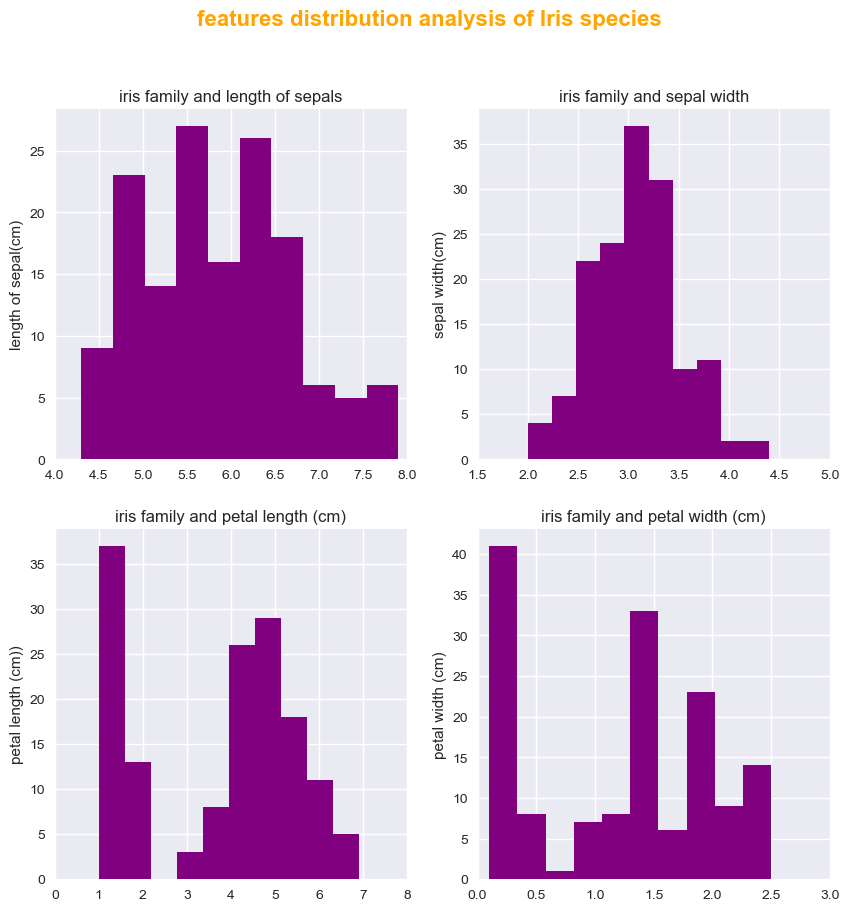

In [13]:
plt.style.use('seaborn-v0_8')
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(10,10))
ax0.hist(iris_df['sepal length (cm)'], color='purple')
ax0.set_xlim(4,8)
ax0.set(title='iris family and length of sepals',
       ylabel='length of sepal(cm)')

ax1.hist(iris_df['sepal width (cm)'], color='purple')
ax1.set_xlim(1.5, 5)
ax1.set(title='iris family and sepal width',
       ylabel='sepal width(cm)')

ax2.hist(iris_df['petal length (cm)'], color='purple')
ax2.set_xlim(0, 8)
ax2.set(title='iris family and petal length (cm)',
       ylabel='petal length (cm))')

ax3.hist(iris_df['petal width (cm)'], color='purple')
ax3.set_xlim(0, 3)
ax3.set(title='iris family and petal width (cm)',
       ylabel='petal width (cm)')

#figure title
fig.suptitle('features distribution analysis of Iris species', 
             fontsize=16,
            fontweight='bold',
            color='orange')

### correlation matrix and heatmap

In [15]:
corr = iris_df.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


Text(0.5, 0.98, 'Heatmap')

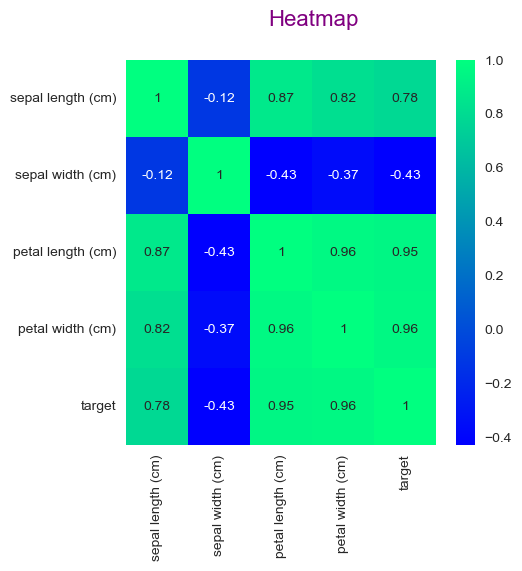

In [16]:
fig, ax= plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax, cmap='winter')
fig.suptitle(t='Heatmap',
           color='purple',
           fontsize=16)

### feature engineering

In [18]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [19]:
preds_data1=iris_df.iloc[32]
preds_data1

sepal length (cm)    5.2
sepal width (cm)     4.1
petal length (cm)    1.5
petal width (cm)     0.1
target               0.0
Name: 32, dtype: float64

In [20]:
preds_data2=iris_df.iloc[76]
preds_data2

sepal length (cm)    6.8
sepal width (cm)     2.8
petal length (cm)    4.8
petal width (cm)     1.4
target               1.0
Name: 76, dtype: float64

In [21]:
preds_data3=iris_df.iloc[132]
preds_data3

sepal length (cm)    6.4
sepal width (cm)     2.8
petal length (cm)    5.6
petal width (cm)     2.2
target               2.0
Name: 132, dtype: float64

In [22]:
iris_df.shape

(150, 5)

In [23]:
iris_df.drop([32,76,132], inplace=True)
iris_df.shape

(147, 5)

#### making x and y features

In [25]:
X= iris_df.drop('target', axis=1)
y=iris_df['target']

In [26]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

### Preparing Training and test data and fitting to the model

In [29]:
np.random.seed(65)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)
clf=DecisionTreeClassifier(criterion='gini', min_samples_split=2)
clf.fit(X_train, y_train)
score=clf.score(X_test, y_test)
print(f'Model accuracy on test data={score*100:.2f}%')

Model accuracy on test data=96.67%


### Model Evaluation

In [31]:
y_preds=clf.predict(X_test)
print(f"Classifiication report:\n\n{classification_report(y_test, y_preds)}")

Classifiication report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.89      1.00      0.94         8
         2.0       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [32]:
cf_matrix=confusion_matrix(y_test, y_preds)
print(f'Confusion matrix:\n\n{cf_matrix}')

Confusion matrix:

[[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]


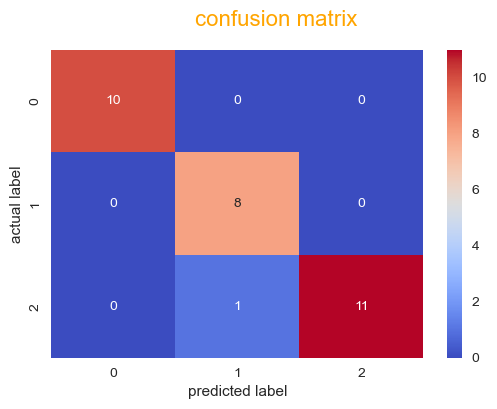

In [33]:
#visualizing confusion matrix
fig, ax=plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm')
fig.suptitle(t='confusion matrix',
            color='orange',
            fontsize=16)
ax.set(xlabel="predicted label",
      ylabel="actual label");

In [34]:
print(f'accuracy score:\n\n{accuracy_score(y_test, y_preds)*100:.2f}%')

accuracy score:

96.67%


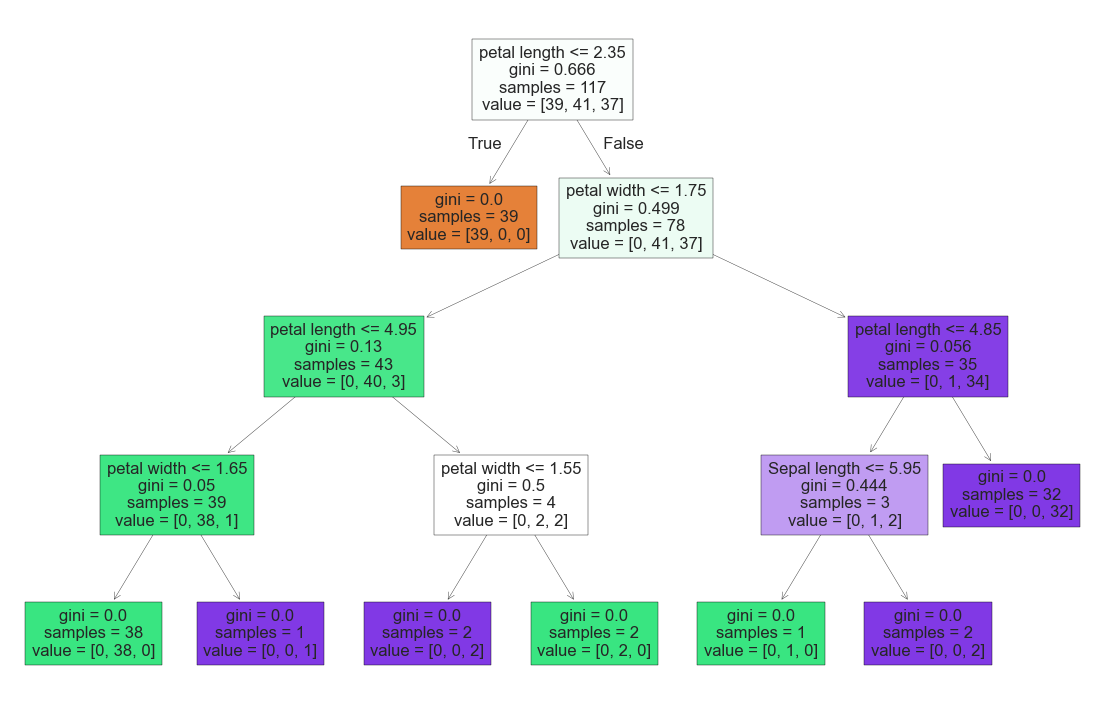

In [35]:
plt.figure(figsize=(14,9))
tree.plot_tree(clf, filled=True, feature_names=['Sepal length', 'sepal width', 'petal length', 'petal width']);

#### making prediction on unseen data

In [37]:
preds_data1

sepal length (cm)    5.2
sepal width (cm)     4.1
petal length (cm)    1.5
petal width (cm)     0.1
target               0.0
Name: 32, dtype: float64

In [38]:
pred_x1=pd.DataFrame(np.array([5.2, 4.1, 1.5, 0.1]).reshape(1,-1),
                    columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
pred_y1=clf.predict(pred_x1)
print(f'predicted class by model on preds_data:{pred_y1}')

predicted class by model on preds_data:[0.]


In [39]:
preds_data2

sepal length (cm)    6.8
sepal width (cm)     2.8
petal length (cm)    4.8
petal width (cm)     1.4
target               1.0
Name: 76, dtype: float64

In [40]:
pred_x2=pd.DataFrame(np.array([6.8, 2.8, 4.8, 1.4]).reshape(1,-1),
                    columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
pred_y2=clf.predict(pred_x2)
print(f'predicted class by model on preds_data:{pred_y2}')

predicted class by model on preds_data:[1.]


In [41]:
preds_data3

sepal length (cm)    6.4
sepal width (cm)     2.8
petal length (cm)    5.6
petal width (cm)     2.2
target               2.0
Name: 132, dtype: float64

In [42]:
pred_x3=pd.DataFrame(np.array([6.4, 2.8, 5.6, 2.2]).reshape(1,-1),
                    columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
pred_y3=clf.predict(pred_x3)
print(f'predicted class by model on preds_data:{pred_y3}')

predicted class by model on preds_data:[2.]


### saving the model and loading it

In [44]:
import pickle
pickle.dump(clf, open('decision_tree_model.pkl', 'wb'))

In [45]:
loaded_model=pickle.load(open('decision_tree_model.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.9666666666666667